<a href="https://colab.research.google.com/github/ThomasNgVn/Street-View-House-Numbers-Classifier/blob/main/Street_View_House_Numbers_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Image classifier for the SVHN dataset**


I will create a CNN model that classifies real-world images digits. 


## **Load** **Data**

In [ ]:
!wget --no-check-certificate \
    http://ufldl.stanford.edu/housenumbers/train_32x32.mat \
    -O /tmp/train.mat

!wget --no-check-certificate \
    http://ufldl.stanford.edu/housenumbers/test_32x32.mat \
    -O /tmp/test.mat

--2021-09-21 08:59:34--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘/tmp/train.mat’

/tmp/train.mat      100%[===================>] 173.61M  19.3MB/s    in 10s     

2021-09-21 08:59:44 (16.8 MB/s) - ‘/tmp/train.mat’ saved [182040794/182040794]

--2021-09-21 08:59:44--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘/tmp/test.mat’

/tmp/test.mat       100%[===================>]  61.30M  17.6MB/s    in 4.8s    

2021-09-21 08:59:50 (12.8 MB/s) - ‘/tmp/test.mat’ saved [64275384/642753

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import pandas as pd

I will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.



In [ ]:
# Load the dataset from your Drive folder

train = loadmat('/tmp/train.mat')
test = loadmat('/tmp/test.mat')

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
#Extract the training and testing images and labels separately from the train and test
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train = np.transpose(X_train,(3,0,1,2))/255.
X_test = np.transpose(X_test,(3,0,1,2))/255.
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train % 10)
y_test = encoder.fit_transform(y_test % 10)

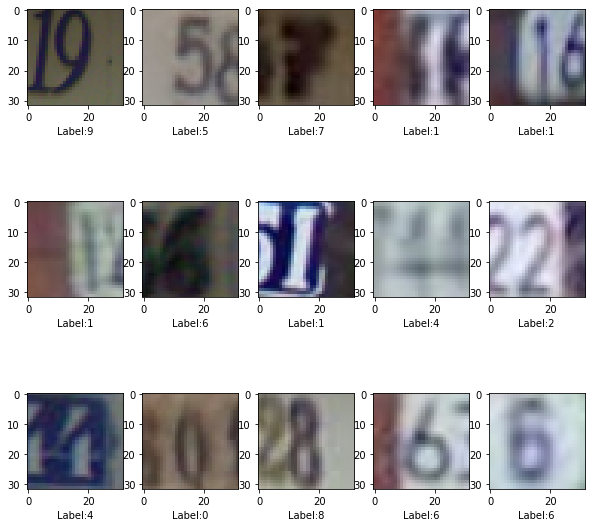

In [ ]:
#Random show images and coressponding labels from dataset
import random
import matplotlib.pyplot as plt
def im_show(x,y):
    idxs = random.sample(range(100),15)
    fig, axs = plt.subplots(nrows=3,ncols=5, figsize=(10,10))
    for idx,ax in zip(idxs,axs.flatten()):
        if (x[idx].shape == (32,32,3)):
            ax.imshow(x[idx])
        ax.set_xlabel('Label:'+ str(np.argmax(y[idx])))
im_show(X_train,y_train)

## 3. CNN neural network classifier


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout


In [ ]:
model = Sequential([Conv2D(16,(3,3),activation='relu', input_shape=(32,32,3)),
                    MaxPool2D(2,2),
                    BatchNormalization(),
                    Conv2D(32,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    BatchNormalization(),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    BatchNormalization(),
                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 15, 15, 16)        64        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop= EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkp = ModelCheckpoint(filepath='/tmp/Mcheck',monitor='val_loss',save_weights_only=True,save_best_only = True, verbose = 1)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=0.15,
                    callbacks=[early_stop,checkp],
                    verbose=2)

Epoch 1/30
1946/1946 - 57s - loss: 0.6816 - accuracy: 0.7893 - val_loss: 0.3947 - val_accuracy: 0.8857

Epoch 00001: val_loss improved from inf to 0.39469, saving model to /tmp/Mcheck
Epoch 2/30
1946/1946 - 57s - loss: 0.4096 - accuracy: 0.8772 - val_loss: 0.4688 - val_accuracy: 0.8568

Epoch 00002: val_loss did not improve from 0.39469
Epoch 3/30
1946/1946 - 58s - loss: 0.3545 - accuracy: 0.8947 - val_loss: 0.3729 - val_accuracy: 0.8879

Epoch 00003: val_loss improved from 0.39469 to 0.37287, saving model to /tmp/Mcheck
Epoch 4/30
1946/1946 - 58s - loss: 0.3206 - accuracy: 0.9046 - val_loss: 0.3594 - val_accuracy: 0.8950

Epoch 00004: val_loss improved from 0.37287 to 0.35942, saving model to /tmp/Mcheck
Epoch 5/30
1946/1946 - 59s - loss: 0.2920 - accuracy: 0.9120 - val_loss: 0.3496 - val_accuracy: 0.8971

Epoch 00005: val_loss improved from 0.35942 to 0.34956, saving model to /tmp/Mcheck
Epoch 6/30
1946/1946 - 60s - loss: 0.2718 - accuracy: 0.9183 - val_loss: 0.3444 - val_accuracy: 0

In [ ]:
model.evaluate(X_test,y_test)

814/814 [==============================] - 8s 10ms/step - loss: 0.3546 - accuracy: 0.9174


[0.35456162691116333, 0.9173709154129028]

Text(0.5, 0, 'epoch')

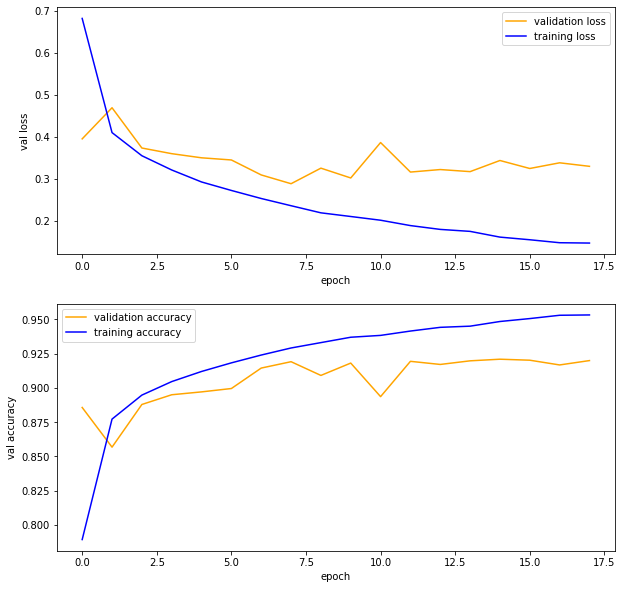

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(10,10))
axs[0].plot(history.history['val_loss'], label = 'validation loss', color = 'orange')
axs[0].plot(history.history['loss'], label = 'training loss', color = 'blue')
axs[0].set_ylabel('val loss')
axs[0].set_xlabel('epoch')
axs[0].legend()
axs[1].plot(history.history['val_accuracy'], label = 'validation accuracy',color = 'orange')
axs[1].plot(history.history['accuracy'], label = 'training accuracy',color = 'blue')
axs[1].set_ylabel('val accuracy')
axs[1].legend()
axs[1].set_xlabel('epoch')

## 4. Get model predictions
* Load the best weights CNN models saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.


In [ ]:
model.load_weights('/tmp/Mcheck')

In [ ]:
def random_pred(m):
  num = X_test.shape[0]
  idxs = random.sample(range(0,num+1),6)
  fig, axs = plt.subplots(1,5, figsize=(15,15))
  for idx, ax in zip(idxs,axs.flatten()):
    ax.imshow(X_test[idx])
    pred = model.predict(X_test[idx][np.newaxis, ...])
    ax.set_xlabel('prediction:' +str(np.argmax(pred)))

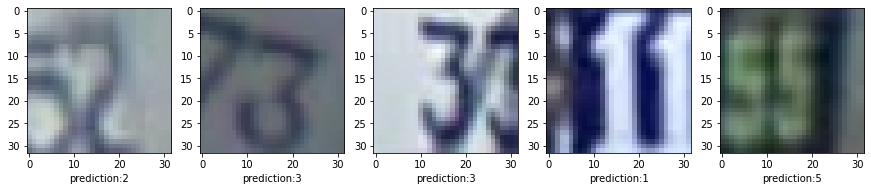

In [ ]:
random_pred(model)

In [ ]:
model.save('Model_SVHM.h5')

In [ ]:
files.download('Model_SVHM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>